In [ ]:
!pip install shap
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.7 MB/s 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=2)
KNN_class.fit(X_train, y_train)
y_pred_KNN=KNN_class.predict(X_test)

In [ ]:
# Fits the explainer
explainer = shap.Explainer(KNN_class.predict, X_test[0:100])
# Calculates the SHAP values - It takes some time
shap_values = explainer( X_test[0:100])

Permutation explainer: 101it [1:38:33, 59.13s/it]


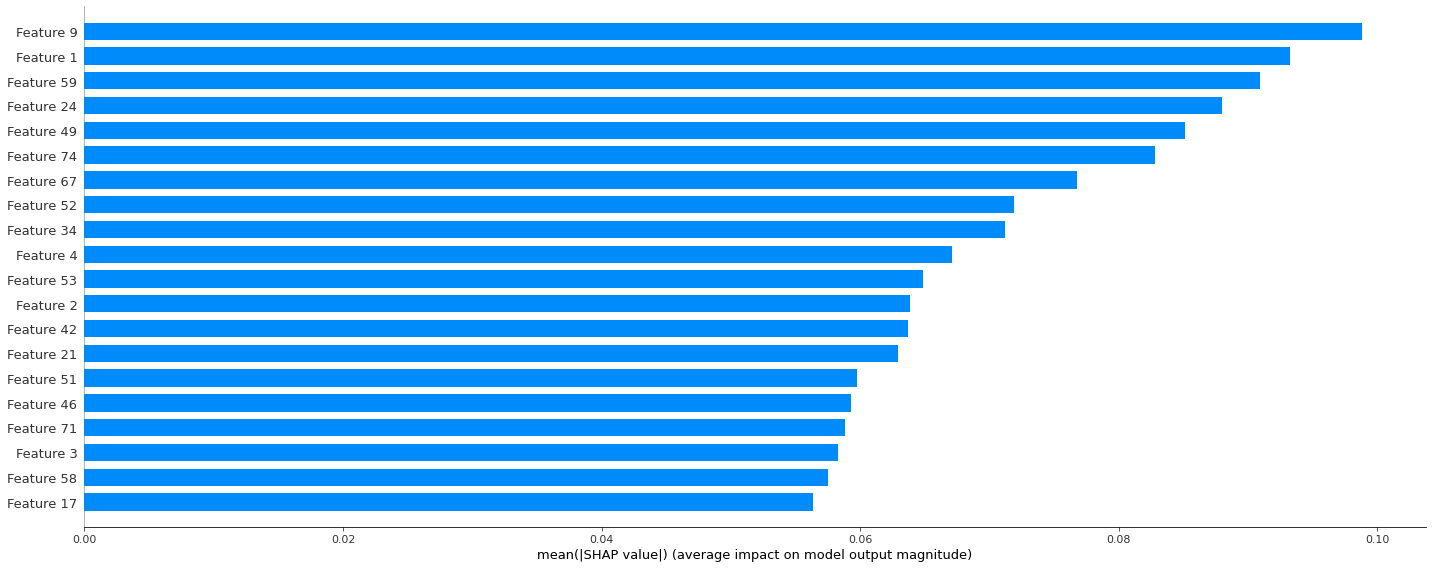

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar",plot_size=(20,8))

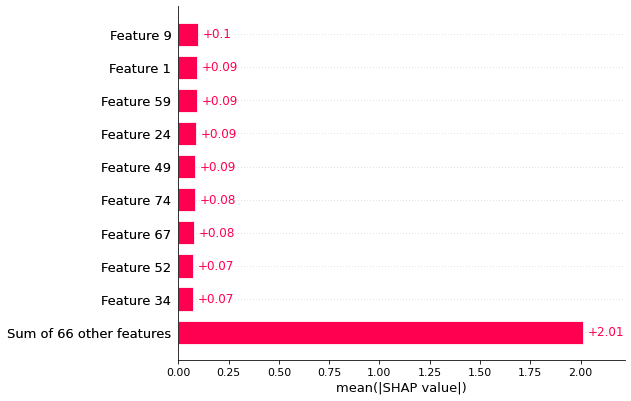

In [ ]:
shap.plots.bar(shap_values)

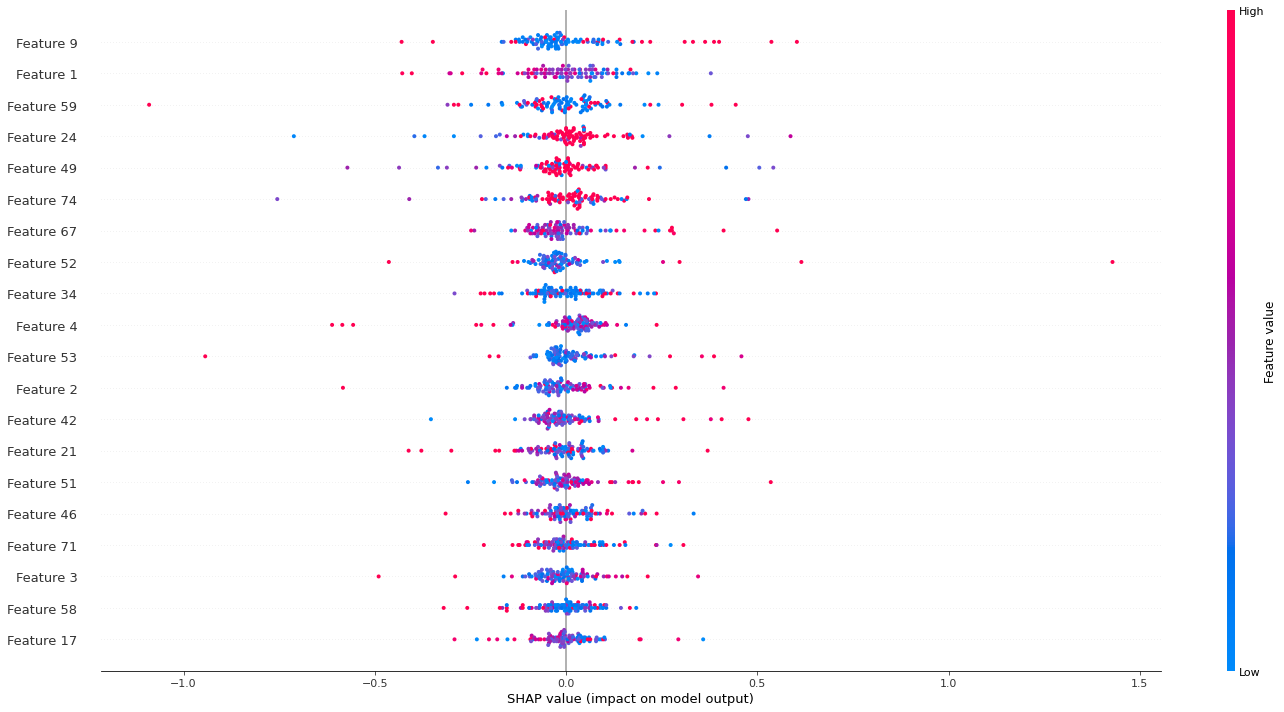

In [ ]:
shap.summary_plot(shap_values,plot_size=(20,10))

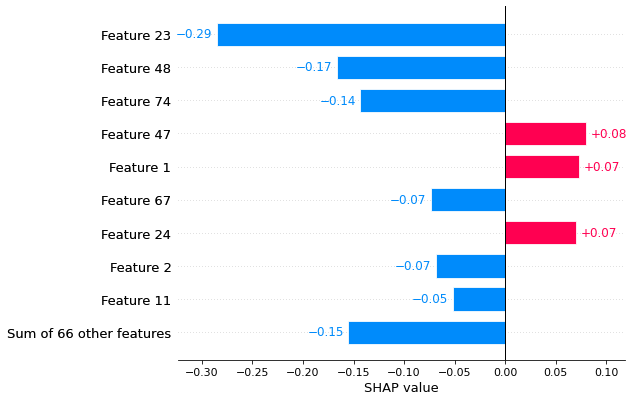

In [ ]:
shap.plots.bar(shap_values[1])

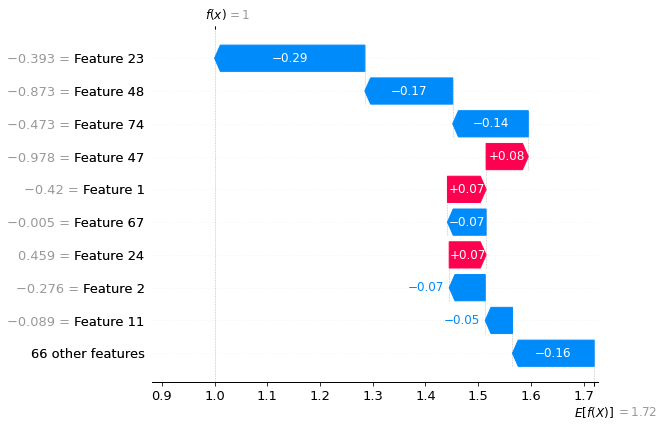

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])



---



In [ ]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(KNN_class.predict_proba, X_train[0:100])
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap.initjs()
# Force plot
prediction = KNN_class.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])

The RF predicted: 1


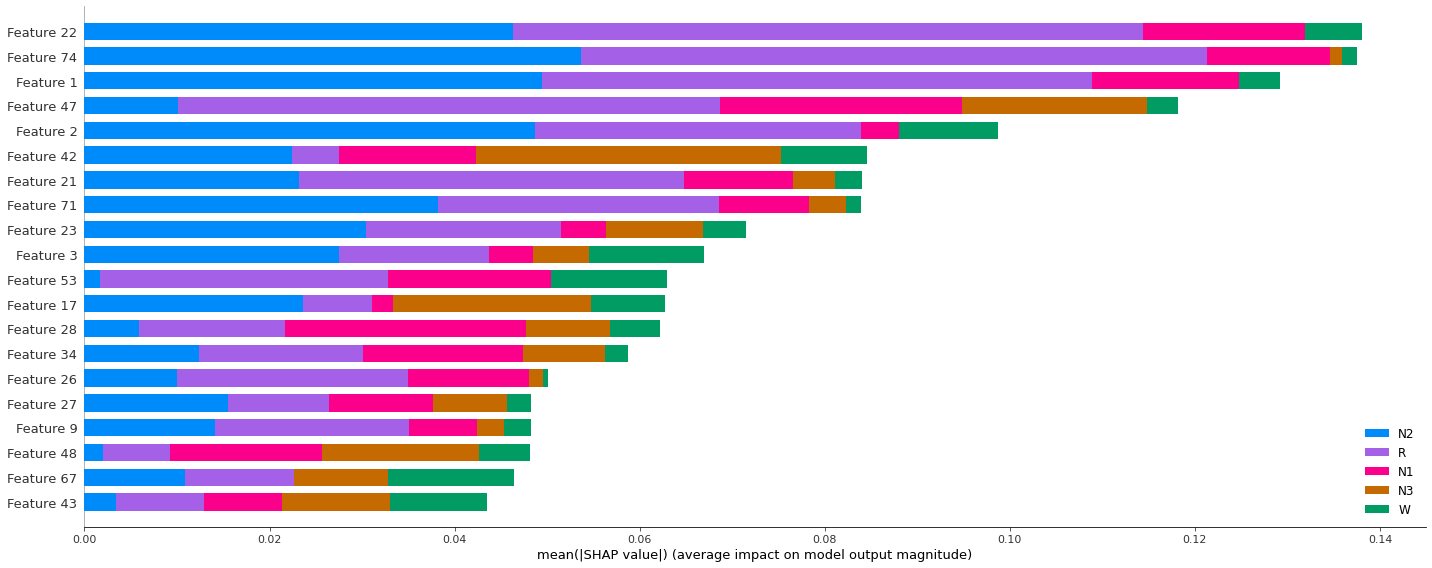

In [ ]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=["N1","N2","N3","R","W"],plot_size=(20,8))